In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [2]:
df = pd.read_csv(r"C:\Users\asamm\Documents\Data Science Practice\creditcard_2023.csv")

In [3]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [4]:
df['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [5]:
df = df.sample(frac=1)

In [6]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-3.429258e-17,-7.500795e-17,1.002549e-16,-7.990841e-17,-3.169889e-17,2.761275e-17,4.817115e-17,8.249258e-17,9.085152e-18,...,-7.974519e-17,8.810442e-18,1.347026e-17,3.724205e-17,4.570301e-17,6.928336e-17,-3.874076e-17,2.186415e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [7]:
X = df.drop(['id', 'Class'], axis=1)
y = df['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)

StandardScaler()

In [10]:
log_reg = LogisticRegression()

In [11]:
log_reg.fit(X_train, y_train)

C:\Users\asamm\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
preds = log_reg.predict(X_test)
preds

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [13]:
log_reg.predict_proba(X_test)

array([[9.98525177e-01, 1.47482348e-03],
       [6.70567514e-07, 9.99999329e-01],
       [9.93115437e-01, 6.88456275e-03],
       ...,
       [8.78288258e-01, 1.21711742e-01],
       [9.98537520e-01, 1.46248036e-03],
       [5.82696788e-02, 9.41730321e-01]])

In [14]:
score = log_reg.score(X_test, y_test)
print(score)

0.9580888870130418


In [15]:
accuracy_score(y_test, preds)

0.9580888870130418

In [16]:
importance = log_reg.coef_[0]
importance

array([-6.15194785e-01,  9.57007406e-02, -7.13071913e-01,  2.75416652e+00,
        8.44720474e-02,  2.11750903e-01,  4.47378902e-03, -8.39189136e-01,
       -2.04302801e-01, -5.05549842e-01,  9.33849160e-01, -1.72177173e+00,
       -6.77356210e-02, -1.91594624e+00, -1.12898474e-01, -3.82931444e-01,
        2.91152232e-01, -1.82609827e-01, -3.19166096e-01,  1.35036934e-02,
        2.47774841e-01,  5.12831394e-01, -1.96982607e-01, -1.76108922e-02,
        8.98793546e-02, -8.85244132e-02, -1.08356415e-01,  1.07487841e-01,
        3.59047038e-05])

In [17]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.61519
Feature: 1, Score: 0.09570
Feature: 2, Score: -0.71307
Feature: 3, Score: 2.75417
Feature: 4, Score: 0.08447
Feature: 5, Score: 0.21175
Feature: 6, Score: 0.00447
Feature: 7, Score: -0.83919
Feature: 8, Score: -0.20430
Feature: 9, Score: -0.50555
Feature: 10, Score: 0.93385
Feature: 11, Score: -1.72177
Feature: 12, Score: -0.06774
Feature: 13, Score: -1.91595
Feature: 14, Score: -0.11290
Feature: 15, Score: -0.38293
Feature: 16, Score: 0.29115
Feature: 17, Score: -0.18261
Feature: 18, Score: -0.31917
Feature: 19, Score: 0.01350
Feature: 20, Score: 0.24777
Feature: 21, Score: 0.51283
Feature: 22, Score: -0.19698
Feature: 23, Score: -0.01761
Feature: 24, Score: 0.08988
Feature: 25, Score: -0.08852
Feature: 26, Score: -0.10836
Feature: 27, Score: 0.10749
Feature: 28, Score: 0.00004


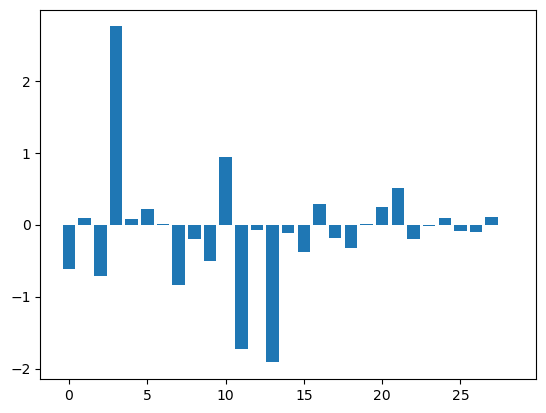

In [18]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [19]:
import xgboost as xgb
from xgboost import XGBClassifier

In [20]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [21]:
preds = model.predict(X_test)
preds

array([0, 1, 0, ..., 0, 0, 1])

In [22]:
accuracy_score(y_test, preds)

0.9996904852347388

In [23]:
gb = GaussianNB()

In [24]:
gb.fit(X_train, y_train)

GaussianNB()

In [25]:
preds = gb.predict(X_test)
preds

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
accuracy_score(y_test, preds)

0.9165857707621098

In [27]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
preds = rfc.predict(X_test)
preds

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
accuracy_score(y_test, preds)

0.9411218503355422